# Total Precipitation and Umbrella Search Trends in India (2004–2024)

This notebook explores the relationship between rainfall patterns and public interest in umbrellas across India using:
- ERA5 total precipitation (monthly)
- Google Trends data for "umbrella"
- Spatial heatmap of June–August rainfall across India

We aim to understand how precipitation influences behavioral interest (e.g., umbrella searches) and where heavy rainfall is most concentrated.


## Step 1: Extract ERA5 Total Precipitation for India

We use the `varunayan` library to download monthly total precipitation (`tp`) for India from 2004 to 2024 at 0.1° resolution. Unit of precipitation is meters

In [1]:
import varunayan

varunayan.describe_variables(["total_precipitation"], dataset_type="single")


=== Variable Descriptions (SINGLE LEVELS) ===

total_precipitation:
  Category: precipitation_variables
  Description: Cumulative precipitation (convective + large-scale). Unit: meters (m) of water equivalent.


In [2]:
df = varunayan.era5ify_geojson(
    request_id="prec_india_2004_2024",
    variables=["total_precipitation"],
    start_date="2004-1-1",
    end_date="2024-12-31",
    json_file="https://gist.githubusercontent.com/JaggeryArray/26b6e4c09ce033305080253002c0ba76/raw/35d1ca0ca8ee64c4b5a0a8c4f22764cf6ac38bd4/india.geojson",
    frequency="monthly",
    resolution=0.1
)


STARTING ERA5 SINGLE LEVEL PROCESSING
Request ID: prec_india_2004_2024
Variables: ['total_precipitation']
Date Range: 2004-01-01 to 2024-12-31
Frequency: monthly
Resolution: 0.1°
GeoJSON File: C:\Users\ATHARV~1\AppData\Local\Temp\prec_india_2004_2024_temp_geojson.json


--- GeoJSON Mini Map ---

MINI MAP (68.18°W to 97.38°E, 8.13°S to 37.08°N):
┌────────────────────────────────────────┐
│········································│
│········■■■■■■■■■·······················│
│········■■■■■■■·························│
│··········■■■■··························│
│········■■■■■■■■■·······················│
│·······■■■■■■■■■■··················■■■··│
│···■■■■■■■■■■■■■■■■■■······■····■■■■■■■·│
│···■■■■■■■■■■■■■■■■■■■■■■■■··■■■■■■■····│
│·■■■■■■■■■■■■■■■■■■■■■■■■■■■····■■■·····│
│···■■■■■■■■■■■■■■■■■■■■■■■■■·····■······│
│···■■··■■■■■■■■■■■■■■■■■■■··············│
│·······■■■■■■■■■■■■■■■■·················│
│·······■■■■■■■■■■■■■■···················│
│·······■■■■■■■■■■■······················│
│······

b27c97db6041ad9d77270d28acde6c50.zip:   0%|          | 0.00/13.8M [00:00<?, ?B/s]

eea070b0d20e28b696fd0f3f0e6d8010.zip:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

2e17719d9bcf9cf9d656ef1006139c7.zip:   0%|          | 0.00/7.86M [00:00<?, ?B/s]


Saving files to output directory: prec_india_2004_2024_output
  Saved final data to: prec_india_2004_2024_output\prec_india_2004_2024_monthly_data.csv
  Saved unique coordinates to: prec_india_2004_2024_output\prec_india_2004_2024_unique_latlongs.csv
  Saved raw data to: prec_india_2004_2024_output\prec_india_2004_2024_raw_data.csv

PROCESSING COMPLETE

RESULTS SUMMARY:
----------------------------------------
Variables processed: 1
Time period:         2004-01-01 to 2024-12-31
Final output shape:  (252, 3)
Total complete processing time: 172.60 seconds

First 5 rows of aggregated data:
         tp  year  month
0  0.030352  2004      1
1  0.012859  2004      2
2  0.025492  2004      3
3  0.063405  2004      4
4  0.081855  2004      5

ERA5 SINGLE LEVEL PROCESSING COMPLETED SUCCESSFULLY


## Step 2: Create Datetime Column & Convert Precipitation Units

We create a `date` column from `year` and `month` and convert ERA5 `tp` values to millimeters by multiplying by 1000.


In [3]:
import pandas as pd

df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df['tp'] = df['tp']*1000

## Step 3: Load and Format Google Trends Data for "Umbrella"

The dataset contains monthly search interest for the keyword "umbrella" in India from 2004 to present. We convert the `Month` column to datetime format for alignment.


In [4]:
df_trend = pd.read_csv("https://gist.githubusercontent.com/JaggeryArray/490818f9cd19336d63f9942589a61bf0/raw/92273fc7c39c5dcc71acb27242a2dd3d6b72b4ed/multiTimeline_india_googletrends_umbrella_2004-now.csv")

In [5]:
df_trend['date'] = pd.to_datetime(df_trend['Month'], format='%Y-%m')

## Step 4: Merge Precipitation and Google Trends Data

We perform an inner join on the `date` column to create a combined dataset of total precipitation and umbrella interest.


In [6]:
df_merged = pd.merge(df, df_trend, on='date', how='inner')

In [7]:
def setup_matplotlib():
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        raise ImportError(
            "Matplotlib is not installed. Install it with: pip install matplotlib"
        )

    plt.rcParams["figure.dpi"] = 300
    plt.rcParams["savefig.dpi"] = 300
    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["font.sans-serif"] = ["Arial"]
    plt.rcParams["axes.labelweight"] = "normal"

    plt.rcParams["mathtext.fontset"] = "custom"
    plt.rcParams["mathtext.rm"] = "Arial"
    plt.rcParams["mathtext.it"] = "Arial:italic"
    plt.rcParams["mathtext.bf"] = "Arial:bold"

## Step 6: Visualize Total Precipitation vs Umbrella Interest

We plot:
- Total precipitation (left Y-axis)
- Log-transformed umbrella search interest (right Y-axis)

This visual helps assess whether increase in precipitation is accompanied by higher umbrella search activity.


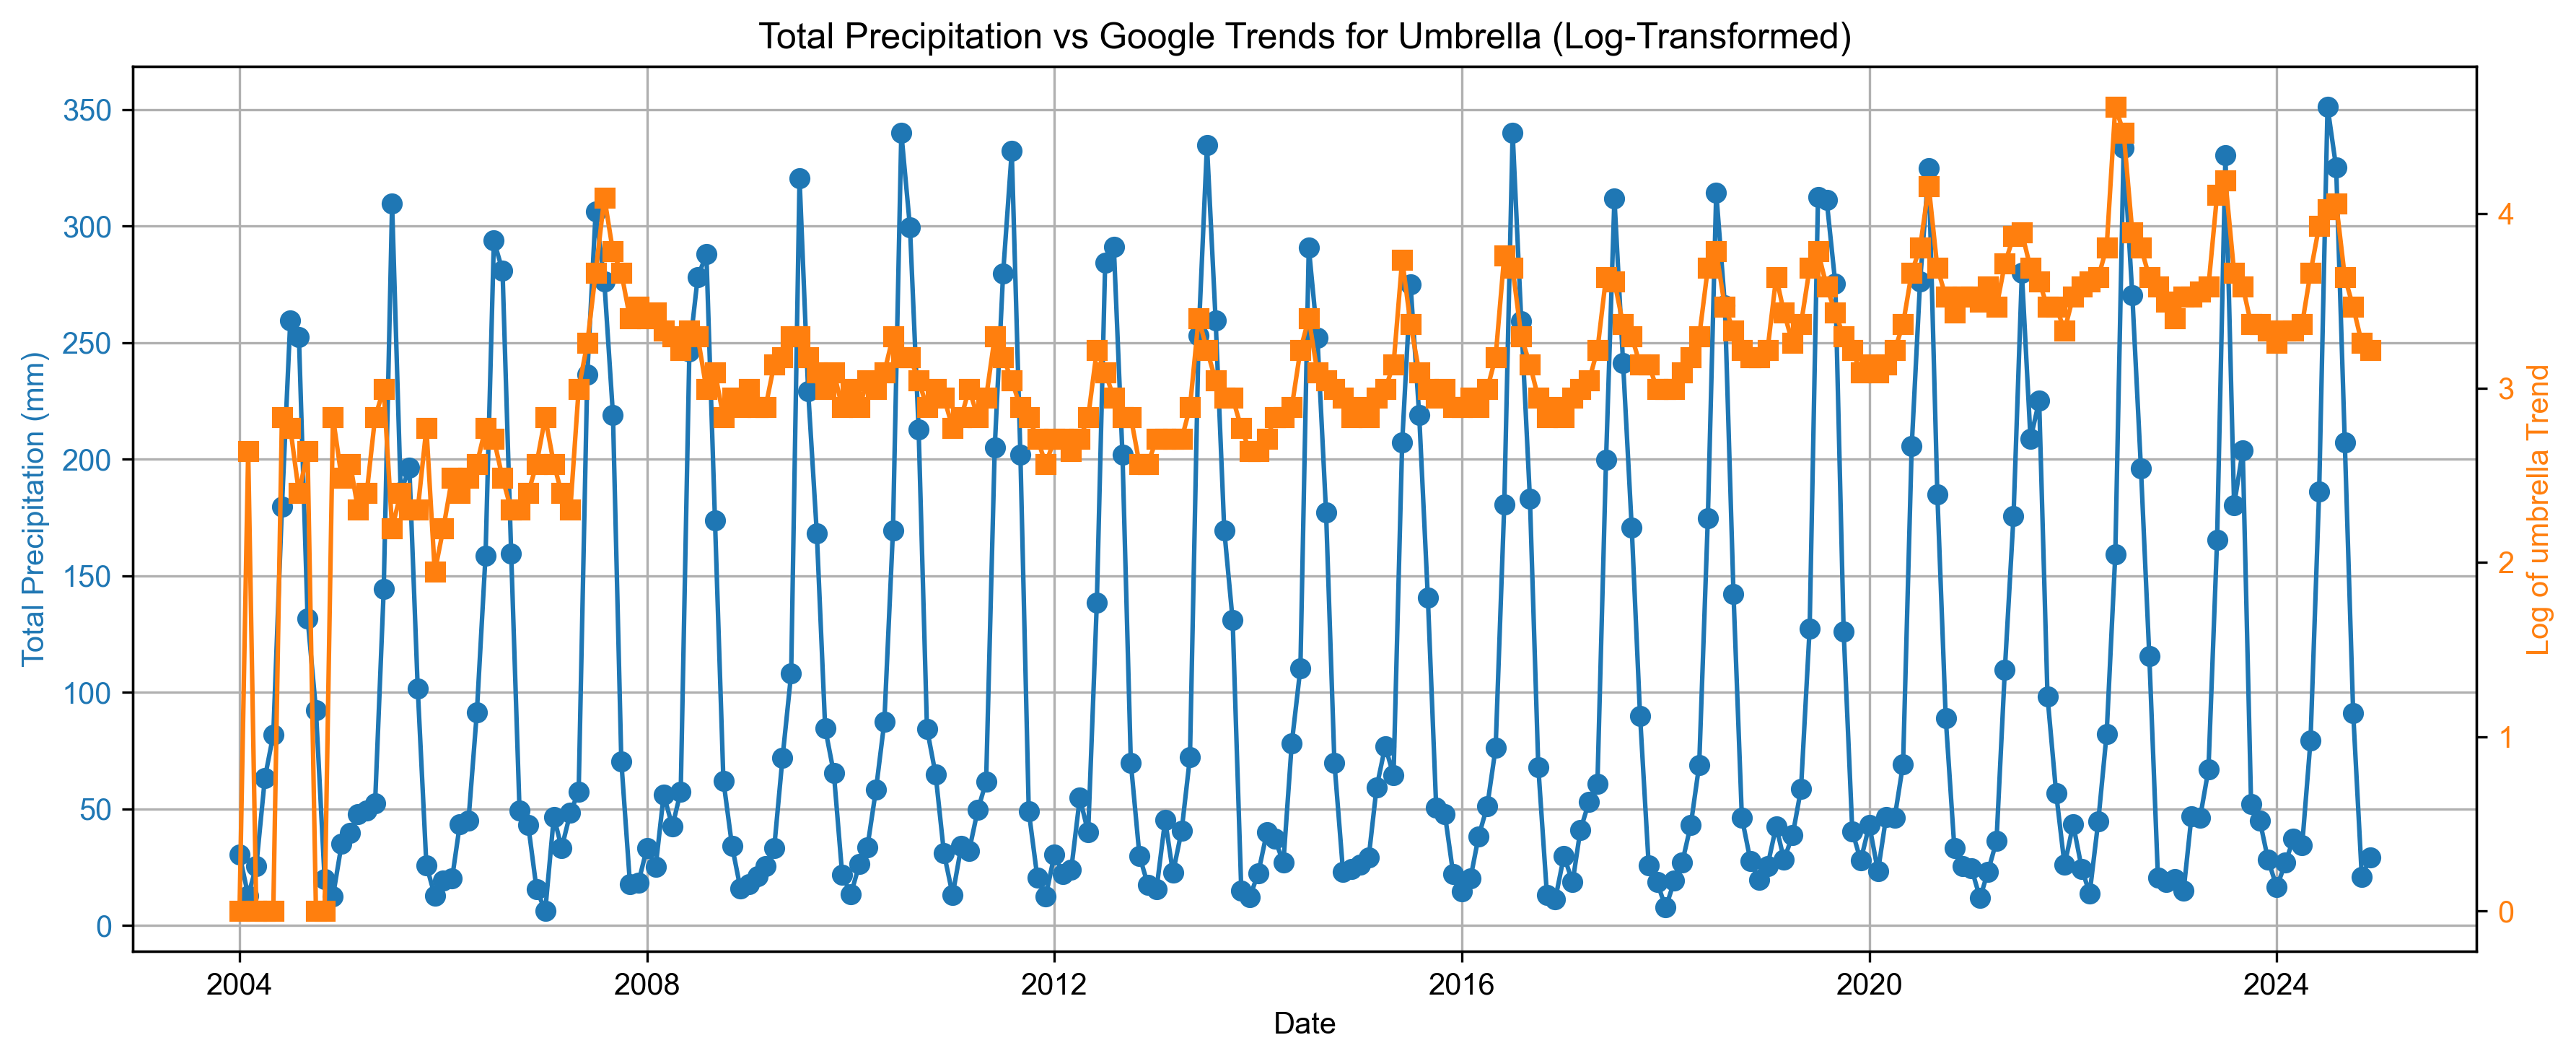

In [8]:
import numpy as np
import matplotlib.pyplot as plt

setup_matplotlib()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot tp on left y-axis
ax1.plot(df_merged['date'], df_merged['tp'], color='tab:blue', marker='o', label='Total Precipitation (tp)')
ax1.set_ylabel('Total Precipitation (mm)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Apply log transform to umbrella
umbrella_log = np.log(df_merged['umbrella'] + 1)  # Add 1 to avoid log(0)

# Plot on right y-axis
ax2 = ax1.twinx()
ax2.plot(df_merged['date'], umbrella_log, color='tab:orange', marker='s', label='umbrella (log-scaled)')
ax2.set_ylabel('Log of umbrella Trend', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and grid
plt.title('Total Precipitation vs Google Trends for Umbrella (Log-Transformed)')
ax1.set_xlabel('Date')
ax1.grid(True)
fig.tight_layout()

plt.show()


## Step 7: Cross-Correlation Function (CCF)

We normalize both `tp` and `umbrella` series and compute the cross-correlation function (CCF) across ±12 months. This reveals any leading or lagging relationships between rainfall and umbrella search interest.


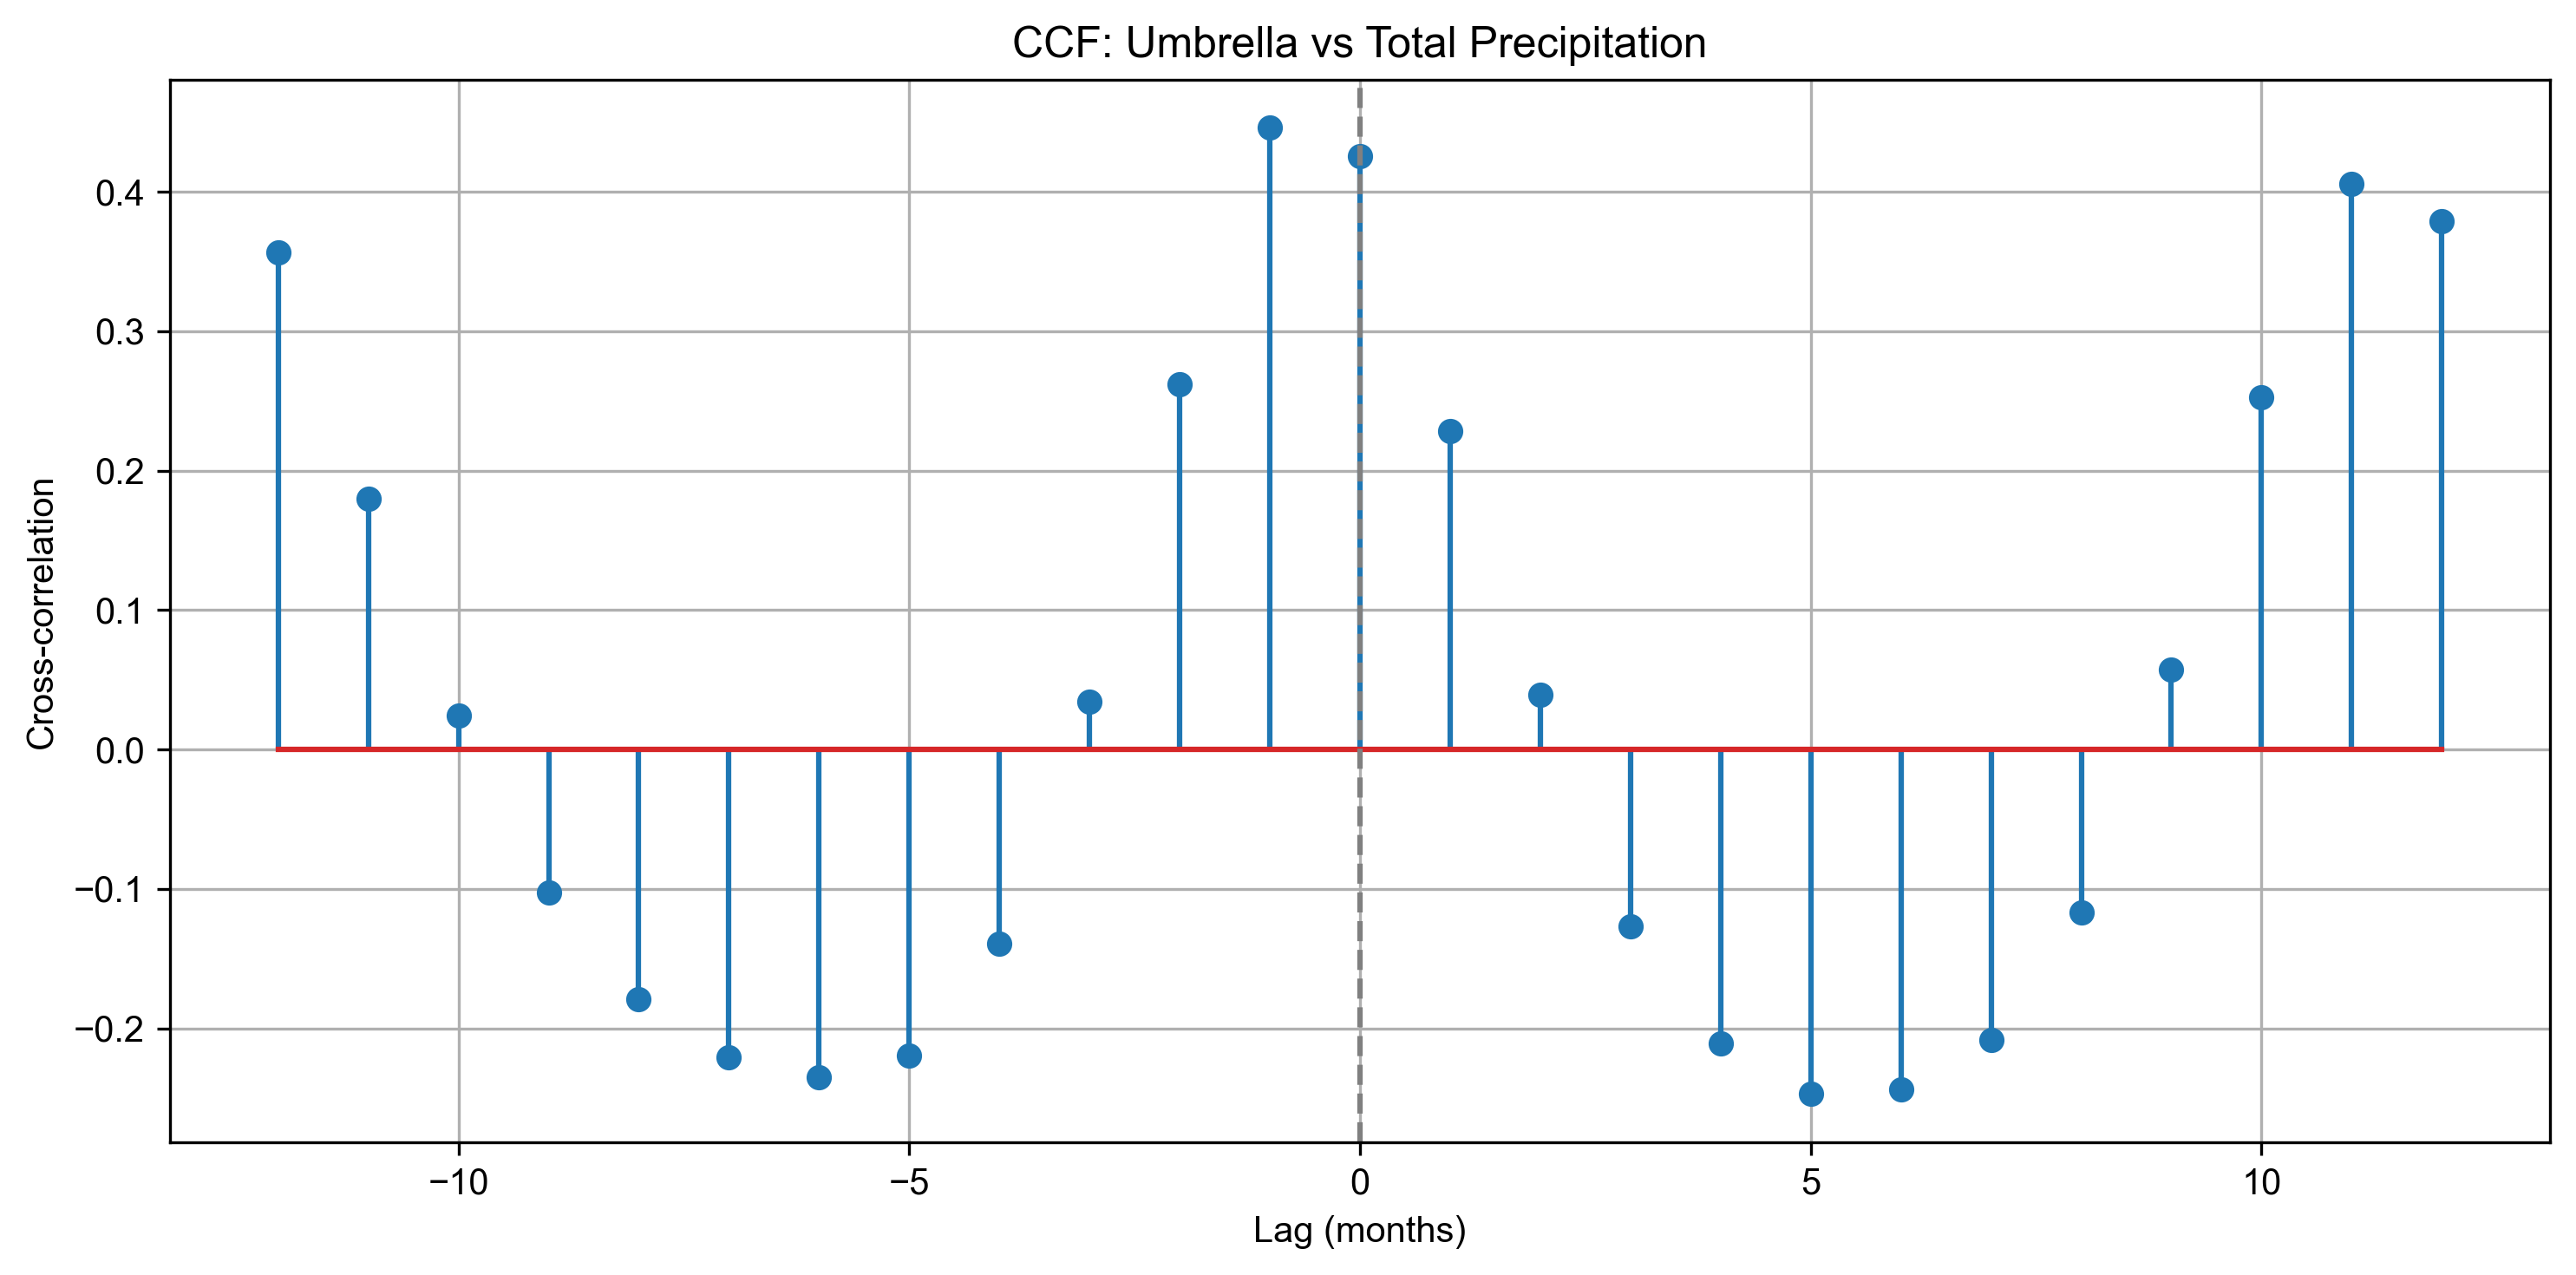

In [9]:
import numpy as np

tp = (df_merged['tp'] - df_merged['tp'].mean()) / df_merged['tp'].std()
umbrella = (df_merged['umbrella'] - df_merged['umbrella'].mean()) / df_merged['umbrella'].std()

# Full cross-correlation
corr = np.correlate(umbrella - umbrella.mean(), tp - tp.mean(), mode='full')
lags = np.arange(-len(umbrella)+1, len(umbrella))
corr = corr / (len(umbrella) * umbrella.std() * tp.std())  # Normalize

lag_limit = 12
mask = (lags >= -lag_limit) & (lags <= lag_limit)
lags_limited = lags[mask]
corr_limited = corr[mask]

# Plot
plt.figure(figsize=(10, 5))
plt.stem(lags_limited, corr_limited)
plt.xlabel('Lag (months)')
plt.ylabel('Cross-correlation')
plt.title('CCF: Umbrella vs Total Precipitation')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


The CCF plot shows that public interest in umbrella leads the peak of total precipitation by one month

## Step 8: Load Raw ERA5 Precipitation Data

We import raw hourly ERA5 total precipitation data (already converted to mm), and filter for June–August months to focus on India's monsoon season.


In [10]:
raw_df = pd.read_csv("prec_india_2004_2024_output/prec_india_2004_2024_raw_data.csv")

## Step 9: Aggregate Rainfall Across Years at Each Grid Point

We compute the total precipitation for June, July, and August at each (latitude, longitude) grid cell averaged across all years.


In [11]:
raw_df['date'] = pd.to_datetime(raw_df['date'])
raw_df['tp'] = raw_df['tp'] * 1000  # Convert to mm

raw_df_rain = raw_df[raw_df['date'].dt.month.isin([6, 7, 8])]

In [12]:
raw_df_avg = raw_df_rain.groupby(['latitude', 'longitude'])['tp'].sum().reset_index()

## Step 10: Visualize Regional Rainfall Patterns During Monsoon

We plot a log-scaled spatial heatmap of average June–August precipitation across India using ERA5 data from 2004 to 2024.

States with the **highest interest in umbrellas during monsoon months (June–August)**—based on Google Trends—are highlighted on the map.

- **Yellow dots** mark the selected high-interest states.
- **Log scaling** is used to simultaneously reveal both high and low precipitation zones.
- This helps identify whether areas with high rainfall also show elevated umbrella-related search behavior.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # For LogNorm

states = [
    "Arunachal Pradesh", "Meghalaya", "Nagaland", "Kerala", "Goa", "Sikkim", "Mizoram", "Maharashtra", "Karnataka", "Dadra and Nagar Haveli"
]

pin_lat = [
    28.2180, 25.4670, 26.1584, 10.1632, 15.2993, 27.3516, 23.1645, 18.7515, 14.3173, 20.27
]

pin_lon = [
    94.7278, 91.3662, 94.5624, 76.6413, 74.1240, 88.3239, 92.9376, 74.0139, 75.3739, 73.02
]

# Pivot data
heatmap_data = raw_df_avg.pivot(index='latitude', columns='longitude', values='tp')

# Plot heatmap with log scale
plt.figure(figsize=(8, 7.5))
ax = sns.heatmap(
    heatmap_data,
    cmap='icefire_r',
    norm=mcolors.LogNorm(vmin=heatmap_data[heatmap_data > 0].min().min(), vmax=heatmap_data.max().max()),
    cbar_kws={'label': 'Avg Total Precipitation (mm) [log scale]'},
    xticklabels=False,  # Remove longitude labels
    yticklabels=False   # Remove latitude labels
)

plt.title('Average Total Precipitation (tp) for June-July-August Across Years (Log Scale)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().invert_yaxis()

lat_vals = heatmap_data.index.values
lon_vals = heatmap_data.columns.values

# Map city lat/lon to heatmap indices
pin_y = [np.argmin(np.abs(lat_vals - lat)) + 0.5 for lat in pin_lat]
pin_x = [np.argmin(np.abs(lon_vals - lon)) + 0.5 for lon in pin_lon]

plt.scatter(pin_x, pin_y, s=5, c='yellow', label='States')

# Add city names as labels
for x, y, city in zip(pin_x, pin_y, states):
    plt.text(x, y, city, fontsize=8, ha='left', va='bottom', color='orange')

plt.legend()

plt.tight_layout()
plt.show()